In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
ipl = pd.read_csv("ipl_matches.csv")
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [4]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
ipl = ipl.iloc[:,:-1]
ipl.dropna(inplace=True)

In [6]:
ipl["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [7]:
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [8]:
ipl = ipl[(ipl['team1'].isin(consistent_team)) & (ipl['team2'].isin(consistent_team))]

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

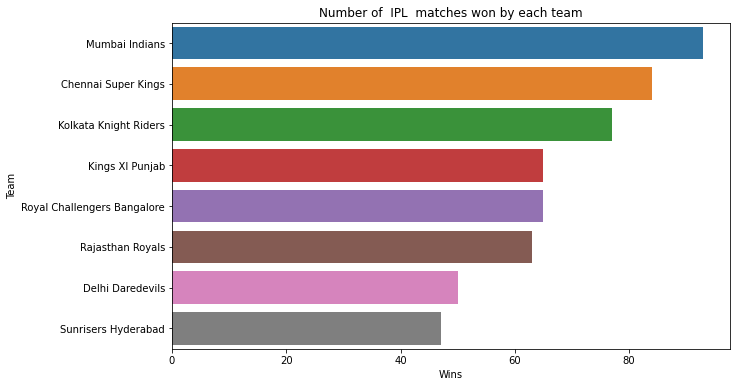

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = ipl,order= ipl['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

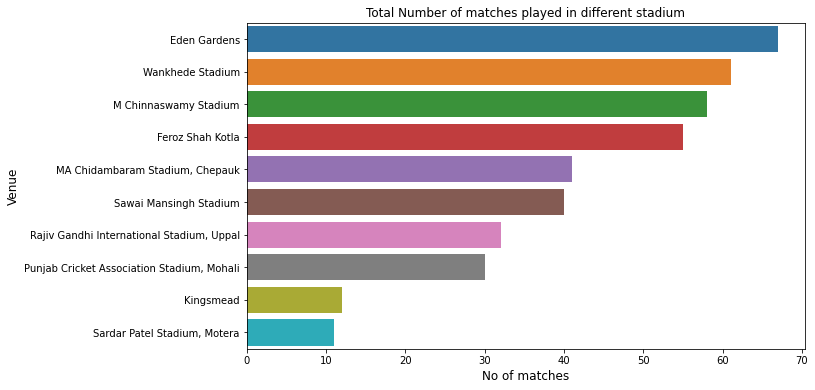

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = ipl,order = ipl['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

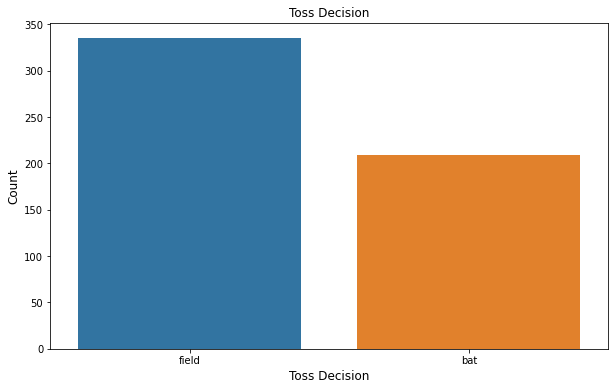

In [11]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data = ipl)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [12]:
ipl.drop(["id", "Season","date", "player_of_match", 'umpire1', "venue", "umpire2", "dl_applied", "result", "win_by_runs", "win_by_wickets"], axis=1, inplace=True)

In [13]:
ipl.head()

,city,team1,team2,toss_winner,toss_decision,winner
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
6,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
7,Indore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab
9,Mumbai,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
10,Kolkata,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders


In [14]:
x = ipl.drop(["winner"], axis=1)
y = ipl["winner"]

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
y = le.fit_transform(y)

In [17]:
x['team1'] = x['team1'].astype('category')
x['team1'] = x['team1'].cat.codes

In [18]:
x['toss_winner'] = x['toss_winner'].astype('category')
x['toss_winner'] = x['toss_winner'].cat.codes

In [19]:
x['toss_decision'] = x['toss_decision'].astype('category')
x['toss_decision'] = x['toss_decision'].cat.codes

In [20]:
x['team2'] = x['team2'].astype('category')
x['team2'] = x['team2'].cat.codes

In [21]:
x['city'] = x['city'].astype('category')
x['city'] = x['city'].cat.codes

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 7)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8676470588235294
Testing Accuracy : 0.5073529411764706


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'n_estimators': 200}

In [25]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=80, max_features=3, n_estimators=200)

In [26]:
grid_search.score(x_test, y_test)

0.5073529411764706

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.32107843137254904
Validation Accuracy : 0.3014705882352941


C:\Users\91701\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8700980392156863
Validation Accuracy : 0.4632352941176471


In [29]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.3480392156862745
Validation Accuracy : 0.34558823529411764
